**Data cleaning and question 1**

1) If I have a house with a waterfront view, how can I further increase the price of my property?

We know that properties with a waterfront tend to be more expensive. How else could a client increase the price of their property if they have a house with a waterfront view?

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

import seaborn as sns

df = pd.read_csv("kc_house_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [3]:
df.duplicated(subset=None, keep='first')

duplicated_rows_df = df[df.duplicated()]

print(duplicated_rows_df)

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


This tells us that there are no duplicate rows based on all columns in the dataframe - we don't need to worry about deleting rows which are exact duplicates of each other for all columns.

**Sales Price**

Our target is sales price. We want to make sure that the values we use as part of the sales price series are free of mistakes, outliers and blank rows. 

In [4]:
df['price'].isna().any()

False

We don't need to worry about deleting or dealing with null values in the sales column.

In [5]:
df['price'].dtype

dtype('float64')

We need to remove outliers from the price column - these are very expensive or cheap properties which may affect the model. We can see from the boxplot below that the data has a lot of expensive properties which fall outside the interquartile range.

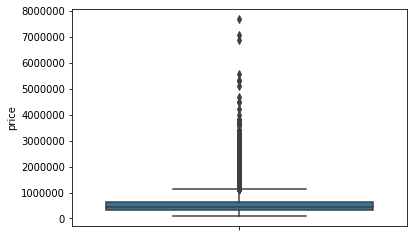

In [6]:
sns.boxplot(y = 'price', data = df, showfliers = True)

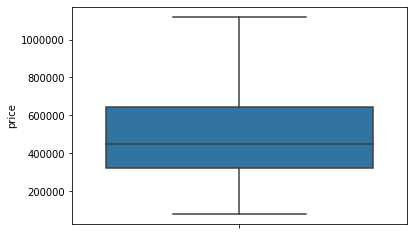

In [7]:
sns.boxplot(y = 'price', data = df, showfliers = False)

This boxplot shows the range of data we have for the house prices with the outliers removed. The median (50% percentile) is USD 450000.

In [8]:
def remove_outlier(df_in, col_name):
   q1 = df_in[col_name].quantile(0.25)
   q3 = df_in[col_name].quantile(0.75)
   iqr = q3-q1 #this calculates the interquartile range
   fence_low  = q1 - (1.5*iqr) #this removes the outliers at the lower range of the dataset for price
   fence_high = q3 + (1.5*iqr) #this removes the outliers at the higher range of the dataset for price
   df_out = df_in.loc[(df_in[col_name] >= fence_low) & (df_in[col_name] <= fence_high)]
   return df_out

In [9]:
df2 = remove_outlier(df,'price')

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20439 entries, 0 to 21596
Data columns (total 21 columns):
id               20439 non-null int64
date             20439 non-null object
price            20439 non-null float64
bedrooms         20439 non-null int64
bathrooms        20439 non-null float64
sqft_living      20439 non-null int64
sqft_lot         20439 non-null int64
floors           20439 non-null float64
waterfront       18170 non-null float64
view             20381 non-null float64
condition        20439 non-null int64
grade            20439 non-null int64
sqft_above       20439 non-null int64
sqft_basement    20439 non-null object
yr_built         20439 non-null int64
yr_renovated     16812 non-null float64
zipcode          20439 non-null int64
lat              20439 non-null float64
long             20439 non-null float64
sqft_living15    20439 non-null int64
sqft_lot15       20439 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.4+ MB


This has removed 1158 outliers from our dataset.

In [11]:
df['price'].mean()

540296.5735055795

In [12]:
df2['price'].mean()

476702.6321248593

We have now removed prices which fall outside the IQR from our dataset.

**Waterfront**

In [14]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.043900e+04,2.043900e+04,20439.000000,20439.000000,20439.000000,2.043900e+04,20439.000000,18170.000000,20381.000000,20439.000000,20439.000000,20439.000000,20439.000000,16812.000000,20439.000000,20439.000000,20439.000000,20439.000000,20439.000000
mean,4.603264e+09,4.767026e+05,3.330936,2.051886,1975.189931,1.458557e+04,1.475561,0.002807,0.172072,3.406625,7.530652,1708.118695,1970.805079,74.184630,98078.578062,47.556892,-122.213337,1921.942218,12427.844709
std,2.877523e+09,2.077903e+05,0.908193,0.710196,773.797924,4.000982e+04,0.536629,0.052907,0.639919,0.647000,1.036060,726.912085,29.159010,377.558988,53.347175,0.141049,0.142326,614.545667,26469.429212
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.131451e+09,3.150000e+05,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,1951.000000,0.000000,98033.000000,47.460400,-122.330000,1470.000000,5046.000000
50%,3.905081e+09,4.375000e+05,3.000000,2.000000,1860.000000,7.500000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,1974.000000,0.000000,98065.000000,47.566900,-122.232000,1800.000000,7542.000000
75%,7.338200e+09,6.000000e+05,4.000000,2.500000,2430.000000,1.031650e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,1996.000000,0.000000,98118.000000,47.679800,-122.123000,2280.000000,9880.000000
max,9.900000e+09,1.120000e+06,33.000000,7.500000,7480.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,5710.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5380.000000,871200.000000


In [16]:
df2['waterfront'].value_counts()

0.0    18119
1.0       51
Name: waterfront, dtype: int64

In [17]:
df2['waterfront'].isna().sum()

2269

In [18]:
df2['waterfront'].mode()

0    0.0
dtype: float64

This shows us that the ratio for houses which have a waterfront and those which do not is 50:17835, or 10:3567, or 1:356.7. In other words, for every 1 house which has a waterfront view, 356.7 houses do not.
We have decided to replace all the null values in the waterfront column with 0, because this is mode value for that column. Replacing any of the null values with a 1 (indicating the presence of a waterfront view) would require us to create another model to predict how likely the houses in question are to have a waterfront view - doing so by using the ratios above would not be an accurate way of doing this.

In [20]:
df2["waterfront"].fillna(int(0), inplace = True) 

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
df2['waterfront'].value_counts()

0.0    20388
1.0       51
Name: waterfront, dtype: int64

**Sqft living**

In [23]:
df2['sqft_living'].isna().any()

False

In [24]:
df2['sqft_living'].dtype

dtype('int64')

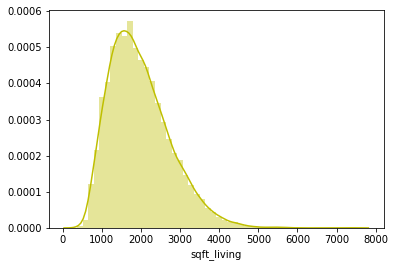

In [25]:
sns.distplot(df2.sqft_living, color = "y")

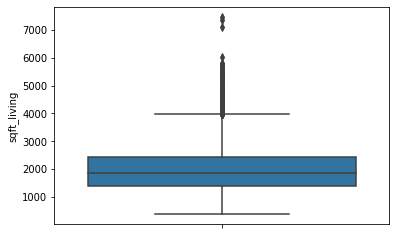

In [26]:
sns.boxplot(y = 'sqft_living', data = df2, showfliers = True)

These two plots show the how the sqft_living data is distributed.

In [27]:
df3 = remove_outlier(df2,'sqft_living')

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20120 entries, 0 to 21596
Data columns (total 21 columns):
id               20120 non-null int64
date             20120 non-null object
price            20120 non-null float64
bedrooms         20120 non-null int64
bathrooms        20120 non-null float64
sqft_living      20120 non-null int64
sqft_lot         20120 non-null int64
floors           20120 non-null float64
waterfront       20120 non-null float64
view             20063 non-null float64
condition        20120 non-null int64
grade            20120 non-null int64
sqft_above       20120 non-null int64
sqft_basement    20120 non-null object
yr_built         20120 non-null int64
yr_renovated     16552 non-null float64
zipcode          20120 non-null int64
lat              20120 non-null float64
long             20120 non-null float64
sqft_living15    20120 non-null int64
sqft_lot15       20120 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.4+ MB


This has removed a further 319 outliers from out dataset.

We can now plot sqft_living, price and whether a waterfront view is present against each other to see whether there is an interesting correlation.

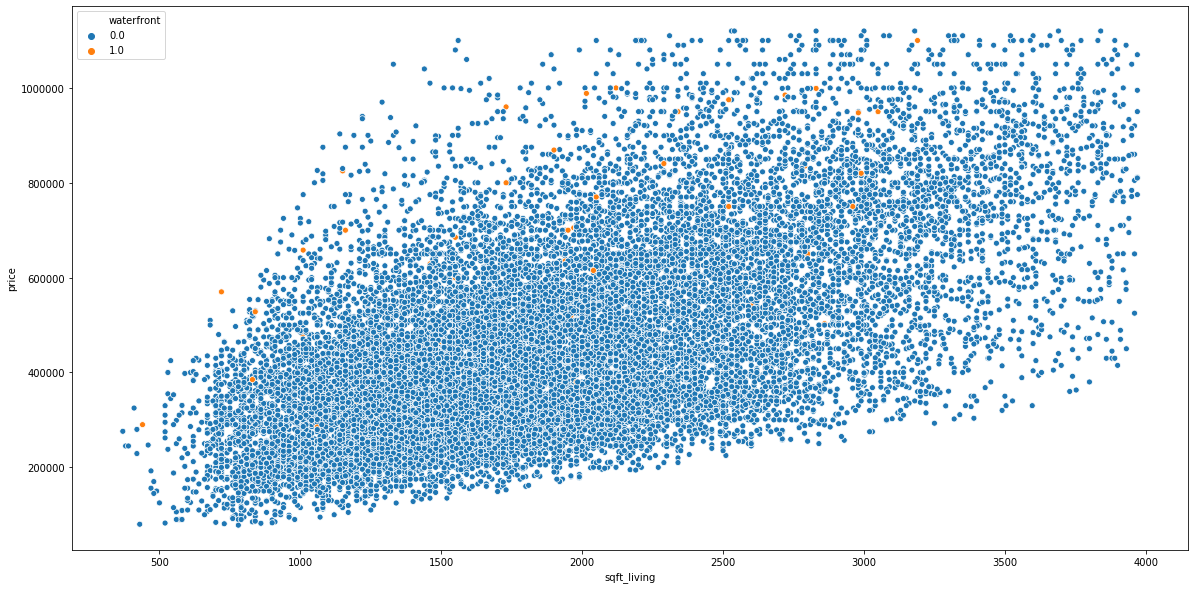

In [29]:
plt.figure(figsize = (20,10))

ax = sns.scatterplot(x="sqft_living", y="price", hue="waterfront",
                      data=df3)

It seems there is an interesting relationship here: the price of a house with a waterfront increases with its size. We could suggest to a client that they could increase the size of their property by adding a basement or extension if they can.

**Floors**

In [30]:
df3['floors'].isna().any()

False

In [31]:
df3['floors'].value_counts()

1.0    10401
2.0     7222
1.5     1821
3.0      565
2.5      105
3.5        6
Name: floors, dtype: int64

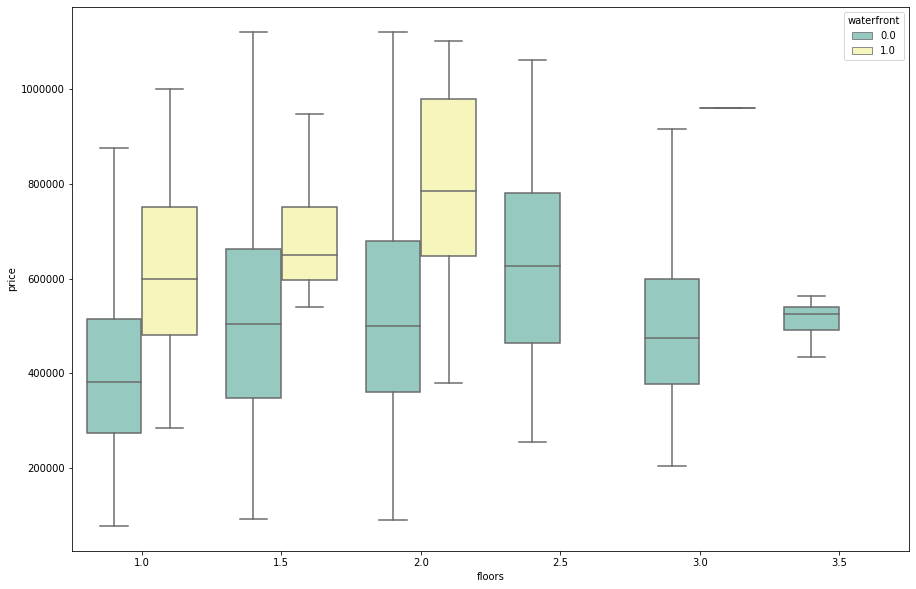

In [32]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="floors", y="price", hue="waterfront",
                data=df3, palette="Set3", showfliers = False)

There seems to be an interesting trend here: until the number of floors reaches 2, the price of a house with a waterfront increases. Beyond this, however, there is no data (meaning that no houses have a waterfront view if they have a large number of floors). We could suggest to a client that they could add a mezzanine to their property in order to increase its sales price.

**Renovation**

We can see that there are a number of nan values in the yr_renovated column, which we need to deal with. We have decided to replace these nan values with the mode, which is 0 (0 means a house has never been renovated).

In [33]:
df3['yr_renovated'].isna().value_counts()

False    16552
True      3568
Name: yr_renovated, dtype: int64

In [34]:
df3['yr_renovated'].mode()

0    0.0
dtype: float64

We will also be able to explore the effect of having a renovation on a house's price and whether it has a waterfront view. We will need to create a new column based on the 'renovation date' column and fill it with meaningful values corresponding to whether a house has been renovated or not (ie. 1 for renovation, 0 for no renovation).

**Grade**

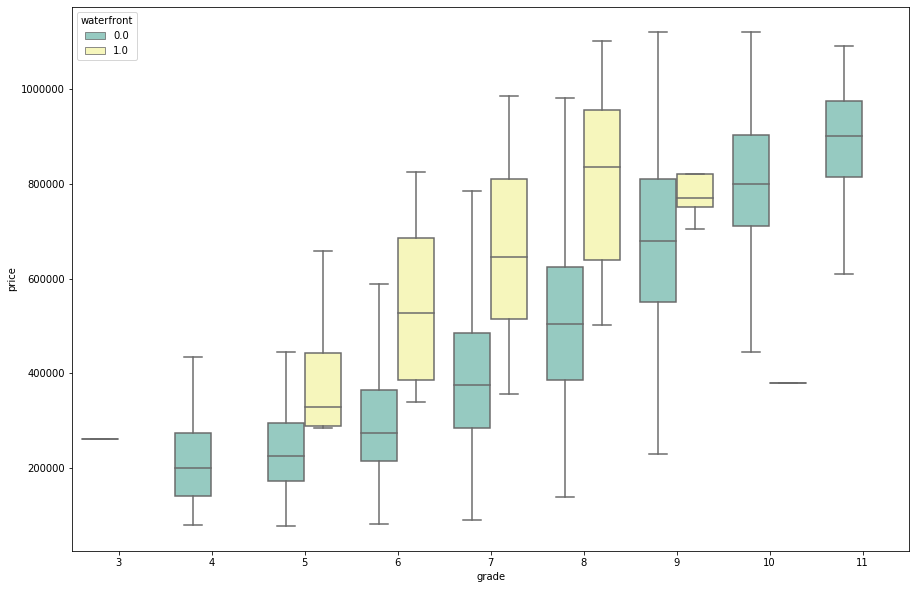

In [35]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="grade", y="price", hue="waterfront",
                data=df3, palette="Set3", showfliers = False)

It seems that houses with a waterfront view increase in price until the house reaches grade 8 (after this, the effect seems to tail off). If clients ensure their houses have a high grade, they can sell them for more.

**Bathrooms**

In [36]:
df3['bathrooms'].dtype

dtype('float64')

In [37]:
df3['bathrooms'].dtype

dtype('float64')

In [38]:
df3['bathrooms'].isna().any()

False

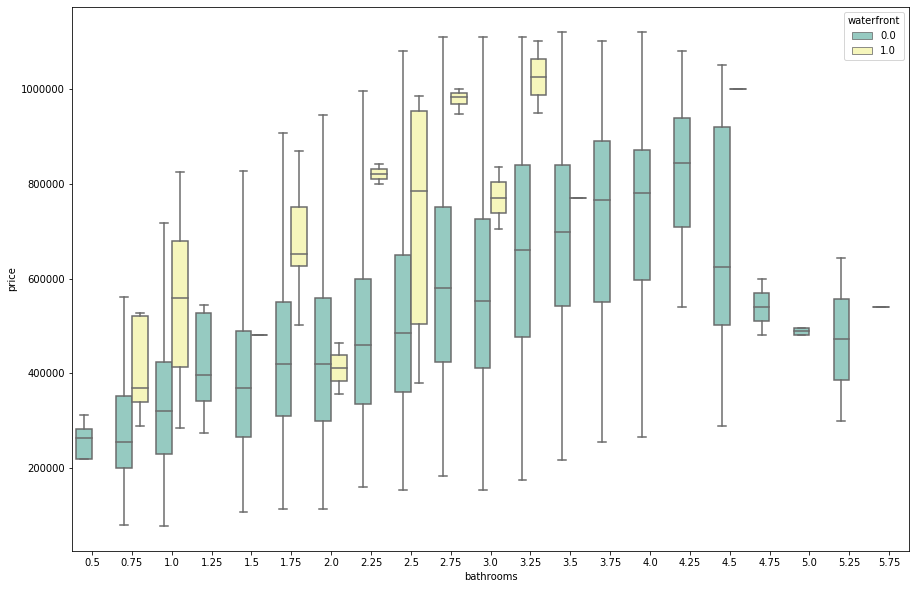

In [39]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x="bathrooms", y="price", hue="waterfront",
                data=df3, palette="Set3", showfliers = False)

It seems that houses with a waterfront view increase in price as the number of bathrooms increase. We can suggest to clients that they can increase their house price by adding an extra toilet or bathroom space.

When we perform the linear regression, we can see which of the above factors (sqft living, number of floors, whether a house has been renovated or not, the grade of a house and the number of bathrooms it has) has a higher influence on its price.